In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import rcParams

from matplotlib.pyplot import figure
rcParams['figure.figsize'] = 11.7,8.27

# Data Cleaning 

1. [Errori](#errori)
2. [Valori Mancanti](#mancanti) 
3. [Outliers](#outlier) 

## Analisi dataset

In [2]:
df = pd.read_csv('words_glasgow.csv')
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


## Errori <a name="errori"></a>

Funzione che controlla se ci sono errori

In [4]:
def check (col, max_num):
    vals = list(col)
    flag = True
    for i, val in enumerate(vals):
        if val < 0 and val > max_num:
            flag = False
            print(val)

    if flag:
        print('Valori corretti')

1. Controllo della lunghezza delle parole: la lunghezza specificata nella variabile length deve corrispondere alla lunghezza effettiva delle parole. 
    * Non ci sono valori errati in lenght.

In [5]:
vals = list(df['word'])
flag = True
for i, word in enumerate(vals):
    if len(word) != df.length[i]:
        flag = False
        print(i, word, df.length[i])
    
if flag:
    print('Valori corretti')


Valori corretti


2. Controllo delle scala dei valori di arousal, valence, dominance: i valori devono essere nel range 0-9. 
    * Non ci sono valori errati.

In [6]:
check(df.arousal, 9)
check(df.valence, 9)
check(df.dominance, 9)

Valori corretti
Valori corretti
Valori corretti


3. Controllo delle scala dei valori di concreteness,imageability,familiarity,aoa,semsize,gender	: i valori devono essere nel range 0-7. 
    * Non ci sono valori errati.

In [7]:
check(df.concreteness, 7)
check(df.imageability, 7)
check(df.familiarity, 7)
check(df.aoa, 7)
check(df.semsize, 7)
check(df.gender, 7)

Valori corretti
Valori corretti
Valori corretti
Valori corretti
Valori corretti
Valori corretti


## Valori mancanti <a name="mancanti"></a>

All'interno del dataset ci sono **14 valori mancanti** all'interno della var. *Web_corpus_freq* che abbiamo decido di sostituire con la mediana della variabile con cui Web_corpus_freq è maggiormente correlata ossìa **familiarity** (corr: 0.579648)

In [8]:
df.isna().sum() # abbiamo valori mancanti nel web_corpus_freq

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64

In [9]:
df.corr('spearman')

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.147804,0.053738,0.007002,-0.202149,-0.202792,-0.141403,0.412430,0.318125,-0.002198,-0.249338,-0.244337
arousal,0.147804,1.000000,0.354573,0.356341,-0.236691,-0.080643,0.167961,-0.004926,0.514712,-0.106969,-0.084989,0.068559
valence,0.053738,0.354573,1.000000,0.702252,0.042002,0.091276,0.294600,-0.188121,0.121232,-0.429474,0.000449,0.300342
dominance,0.007002,0.356341,0.702252,1.000000,0.042363,0.080612,0.234658,-0.141472,0.098469,-0.111078,0.051475,0.223458
concreteness,-0.202149,-0.236691,0.042002,0.042363,1.000000,0.903587,0.097511,-0.387694,-0.400490,0.141523,0.112280,0.025347
imageability,-0.202792,-0.080643,0.091276,0.080612,0.903587,1.000000,0.209765,-0.498524,-0.319086,0.063690,0.101208,0.022608
familiarity,-0.141403,0.167961,0.294600,0.234658,0.097511,0.209765,1.000000,-0.670507,0.045278,-0.217116,0.104050,0.579648
aoa,0.412430,-0.004926,-0.188121,-0.141472,-0.387694,-0.498524,-0.670507,1.000000,0.224328,0.144490,-0.180417,-0.413056
semsize,0.318125,0.514712,0.121232,0.098469,-0.400490,-0.319086,0.045278,0.224328,1.000000,0.148675,-0.137745,0.161435
gender,-0.002198,-0.106969,-0.429474,-0.111078,0.141523,0.063690,-0.217116,0.144490,0.148675,1.000000,0.025161,-0.075323


In [ ]:
sns.heatmap(df.corr('spearman'),annot = True, linewidths=.5, vmin=-1, vmax=1)
plt.show()

Possibili group by:
- familiarity
- aoa

### Group by per familiarity

In [10]:
updated_df = pd.read_csv('words_glasgow.csv')

Correlazione più tra frequenza e familiarity = 0.579648

In [11]:
def fillmedian(x):
    return x.fillna(x.median())

updated_df['web_corpus_freq'] = updated_df['web_corpus_freq'].groupby(updated_df['familiarity']).apply(fillmedian)
updated_df['web_corpus_freq']

0         160074.0
1        4224864.0
2         140105.0
3         124123.0
4         128143.0
           ...    
4677     3192943.0
4678    30735412.0
4679      655010.0
4680    11589578.0
4681     1672374.0
Name: web_corpus_freq, Length: 4682, dtype: float64

La parola Facebook ha come frequenza un valore nan 

In [12]:
updated_df['web_corpus_freq'].isna().sum()

1

In [13]:
updated_df[updated_df['word'] == 'Facebook']

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN


In [14]:
# stampa i valori mancanti 

vals = list(df['word'].unique()) 
count = 1
dic ={}
for i, val in enumerate(vals):
    try:
        if df['web_corpus_freq'].isna()[i] == True:
            print(count, ") ", i, ":", val, "\t", round(updated_df['familiarity'][i],2), "\t", updated_df['web_corpus_freq'][i])
            count = count +1
            dic[val] = updated_df['web_corpus_freq'][i]
    except:
       # print("\nErrore: ", i , "\n")
        pass

1 )  585 : burgle 	 5.2 	 27819488.0
2 )  753 : Christmas 	 6.71 	 27318959.0
3 )  1070 : Dad 	 6.85 	 143590165.0
4 )  1076 : Dame 	 3.7 	 778685.0
5 )  1540 : Facebook 	 6.83 	 nan
6 )  1559 : FALSE 	 5.7 	 6529086.0
7 )  2673 : Mom 	 6.59 	 17862292.5
8 )  2724 : Mum 	 6.91 	 103260853.0
9 )  2726 : Mummy 	 6.18 	 19474194.5
10 )  3773 : skijump 	 4.76 	 2586257.0
11 )  4347 : TRUE 	 6.16 	 7113539.0
12 )  4365 : TV 	 6.71 	 29237400.0
13 )  4373 : Twitter 	 6.27 	 14627316.5
14 )  4668 : yo-yo 	 4.48 	 2214061.5


In [15]:
for word in sorted(dic, key=dic.get, reverse=True):
    print(word, dic[word])

Dad 143590165.0
Facebook nan
Mum 103260853.0
TV 29237400.0
burgle 27819488.0
Christmas 27318959.0
Mummy 19474194.5
Mom 17862292.5
Twitter 14627316.5
TRUE 7113539.0
FALSE 6529086.0
skijump 2586257.0
yo-yo 2214061.5
Dame 778685.0


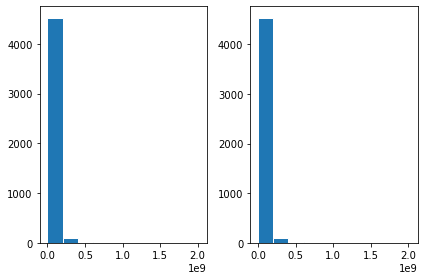

In [16]:
plt.subplot(1,2,1)
plt.hist(df['web_corpus_freq'],edgecolor = 'w') 

plt.subplot(1,2,2)
plt.hist(updated_df['web_corpus_freq'],edgecolor = 'w') 

plt.tight_layout()
plt.show()

In [17]:
#Calcolo Accuracy
updated_df_acc = updated_df.copy(deep=True)
updated_df_acc.drop(updated_df_acc.index[updated_df_acc['word'] == 'Facebook'], inplace = True)
updated_df_acc.drop("word",axis=1,inplace=True)

y1 = updated_df_acc['polysemy']
updated_df_acc.drop("polysemy",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df_acc,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.9281138790035587


### Linear regression

In [18]:
updated_df2_with_name = pd.read_csv('words_glasgow.csv')

In [19]:
updated_df2 = pd.read_csv('words_glasgow.csv')

In [20]:
updated_df2.drop("word",axis=1,inplace=True)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
testdf = updated_df2[updated_df2['web_corpus_freq'].isnull()==True] # creazione dataset per test (solo valori nulli)
traindf = updated_df2[updated_df2['web_corpus_freq'].isnull()==False] # creazione dataset per addestramento (solo valori non nulli)

# Addestramento modello
y = traindf['web_corpus_freq'] # ottengo variabile target
traindf.drop("web_corpus_freq",axis=1,inplace=True) # elimino variabile target da train set
lr.fit(traindf,y) # addestro modello con train set e variabile target

# Utilizzo modello su test set
testdf.drop("web_corpus_freq",axis=1,inplace=True) # elimino var target da test set
pred = lr.predict(testdf) #utilizzo modello addestrato su testset
testdf['web_corpus_freq']= pred # ottengo valori mancanti 

testdf['web_corpus_freq']

C:\Users\aliis\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\aliis\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\aliis\AppData\Local\Temp/ipykernel_14420/2642686688.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

585     9.647566e+06
753     5.266181e+07
1070    1.147744e+08
1076    2.012228e+07
1540    2.071339e+07
1559    8.012922e+07
2673    1.120161e+08
2724    1.146108e+08
2726    6.655875e+07
3773   -2.149065e+06
4347    1.226303e+08
4365    6.885716e+07
4373    1.189524e+07
4668   -1.281355e+07
Name: web_corpus_freq, dtype: float64

In [22]:
# Inserisco valori predetti nel dataset
index_list = testdf['web_corpus_freq'].index
for i in index_list:
    updated_df2_with_name['web_corpus_freq'][i] = abs(round(testdf['web_corpus_freq'][i],0))
updated_df2_with_name.head()

C:\Users\aliis\AppData\Local\Temp/ipykernel_14420/2563809247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df2_with_name['web_corpus_freq'][i] = abs(round(testdf['web_corpus_freq'][i],0))


,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [23]:
# stampa i valori mancanti 
vals = list(df['word'].unique()) 
count = 1
dic ={}
for i, val in enumerate(vals):
    try:
        if df['web_corpus_freq'].isna()[i] == True:
            print(count, ") ", i, ":", val, "\t", updated_df['web_corpus_freq'][i], "\t", updated_df2_with_name['web_corpus_freq'][i])
            count = count +1
            dic[val] = updated_df2_with_name['web_corpus_freq'][i]
    except:
       # print("\nErrore: ", i , "\n")
        pass

1 )  585 : burgle 	 27819488.0 	 9647566.0
2 )  753 : Christmas 	 27318959.0 	 52661807.0
3 )  1070 : Dad 	 143590165.0 	 114774441.0
4 )  1076 : Dame 	 778685.0 	 20122281.0
5 )  1540 : Facebook 	 nan 	 20713390.0
6 )  1559 : FALSE 	 6529086.0 	 80129218.0
7 )  2673 : Mom 	 17862292.5 	 112016071.0
8 )  2724 : Mum 	 103260853.0 	 114610797.0
9 )  2726 : Mummy 	 19474194.5 	 66558747.0
10 )  3773 : skijump 	 2586257.0 	 2149065.0
11 )  4347 : TRUE 	 7113539.0 	 122630346.0
12 )  4365 : TV 	 29237400.0 	 68857159.0
13 )  4373 : Twitter 	 14627316.5 	 11895241.0
14 )  4668 : yo-yo 	 2214061.5 	 12813554.0


In [24]:
# stampa valori in ordine
for word in sorted(dic, key=dic.get, reverse=True):
    print(word, dic[word])

TRUE 122630346.0
Dad 114774441.0
Mum 114610797.0
Mom 112016071.0
FALSE 80129218.0
TV 68857159.0
Mummy 66558747.0
Christmas 52661807.0
Facebook 20713390.0
Dame 20122281.0
yo-yo 12813554.0
Twitter 11895241.0
burgle 9647566.0
skijump 2149065.0


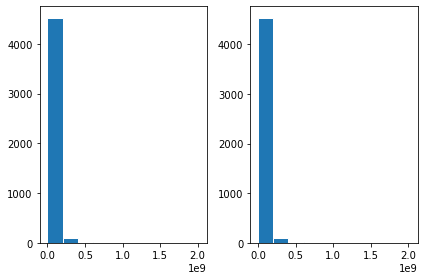

In [25]:
plt.subplot(1,2,1)
plt.hist(df['web_corpus_freq'],edgecolor = 'w') 

plt.subplot(1,2,2)
plt.hist(updated_df2_with_name['web_corpus_freq'],edgecolor = 'w') 

plt.tight_layout()
plt.show()

In [26]:
#Calcolo Accuracy
updated_df2_acc = updated_df2_with_name.copy(deep=True)
updated_df2_acc.drop("word",axis=1,inplace=True)

y1 = updated_df2_acc['polysemy']
updated_df2_acc.drop("polysemy",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df2_acc,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.9224199288256227


### Eliminazione righe

In [27]:
updated_df3 = pd.read_csv('words_glasgow.csv')

updated_df3 = updated_df3.dropna(axis=0)

In [28]:
updated_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4668 non-null   object 
 1   length           4668 non-null   int64  
 2   arousal          4668 non-null   float64
 3   valence          4668 non-null   float64
 4   dominance        4668 non-null   float64
 5   concreteness     4668 non-null   float64
 6   imageability     4668 non-null   float64
 7   familiarity      4668 non-null   float64
 8   aoa              4668 non-null   float64
 9   semsize          4668 non-null   float64
 10  gender           4668 non-null   float64
 11  polysemy         4668 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 510.6+ KB


In [29]:
#Calcolo Accuracy
updated_df3_acc = updated_df3.copy(deep=True)
updated_df3_acc.drop("word",axis=1,inplace=True)

y1 = updated_df3_acc['polysemy']
updated_df3_acc.drop("polysemy",axis=1,inplace=True)

from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df3_acc,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.9179157744468237


## Outliers <a name="outlier"></a>

In [30]:
#df_norm = pd.read_csv('words_glasgow.csv')
df = pd.read_csv('words_glasgow.csv')
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


<AxesSubplot:>

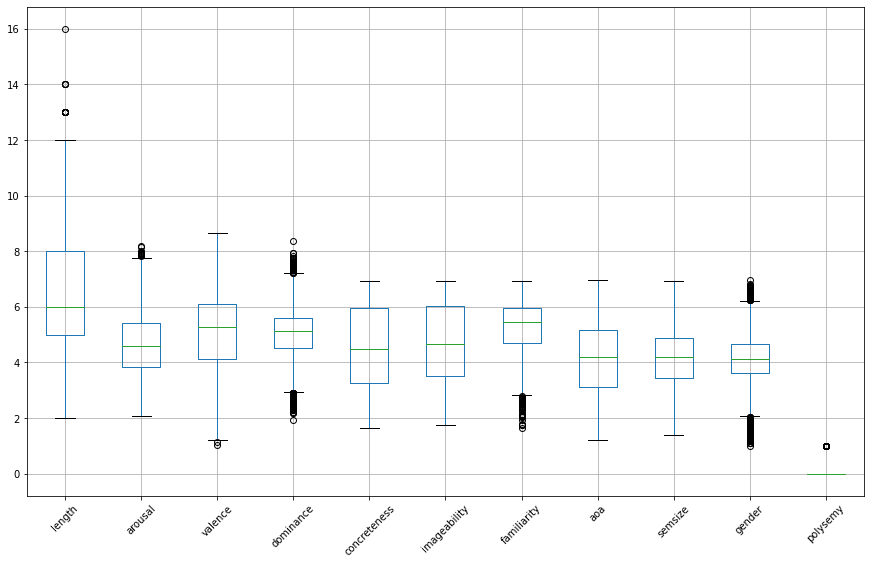

In [31]:
df.drop(['web_corpus_freq'],axis=1).boxplot(figsize=(15,9),  rot=45,)


#df.boxplot(column= ['web_corpus_freq']) 


<AxesSubplot:>

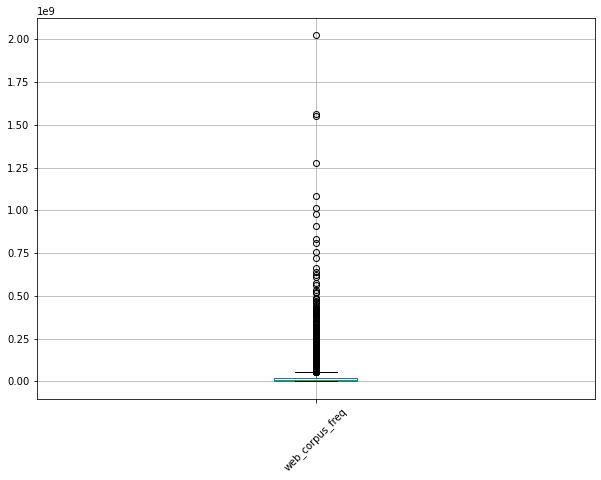

In [32]:
df.boxplot(column= ['web_corpus_freq'],figsize=(10,7),  rot=45)

Variabili con outliers: 
- length
- arousal
- valence
- <b>dominance</b>
- <b>familiarity</b>
- <b>gender</b>
- polysemy
- <b>web_corpus_freq</b>

## Eliminazione diretta degli outliers 
Non è possibile poiché i valori delle variabili (e di conseguenza anche degli outliers) sono di natura soggettiva e quindi è necessario analizzarli singolamente ed eventualkmente eliminarli

In [33]:
# calcolo limite inferiore e superiore outliers
def get_iqr_values(col): 
    q1 = col.quantile(q = 0.25) # calcolo primo quartile
    q3 = col.quantile(q = 0.75) # calcolo terzo quartile
    iqr = q3 - q1
    iqr_left = q1 - 1.5*iqr
    iqr_right = q3 + 1.5*iqr
    return iqr_left, iqr_right

In [34]:
left_l, right_l = get_iqr_values(df.length) 
left_a, right_a = get_iqr_values(df.arousal) 
left_v, right_v = get_iqr_values(df.valence) 
left_d, right_d = get_iqr_values(df.dominance) 
left_f, right_f = get_iqr_values(df.familiarity) 
left_g, right_g = get_iqr_values(df.gender) 
left_p, right_p = get_iqr_values(df.polysemy) 
left_w, right_w = get_iqr_values(df.web_corpus_freq) 

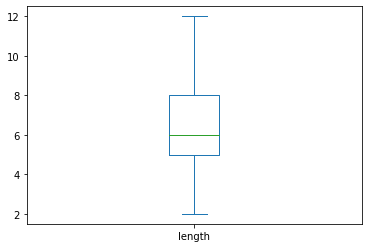

In [35]:
df[(df.length > left_l) & (df.length < right_l)].length.plot.box()
plt.show()

In [36]:
df_outliers = df[(df.length < left_l) | (df.length > right_l) 
                 | (df.arousal < left_a) | (df.arousal > right_a) 
                 | (df.valence < left_v) | (df.valence > right_v)
                 | (df.dominance < left_d) | (df.dominance > right_d)
                 | (df.familiarity < left_f) | (df.familiarity > right_f)
                 | (df.gender < left_g) | (df.gender > right_g)
                 | (df.polysemy < left_p) | (df.polysemy > right_p)
                 | (df.web_corpus_freq < left_w) | (df.web_corpus_freq > right_w)
                ]
df_outliers.count()

word               1224
length             1224
arousal            1224
valence            1224
dominance          1224
concreteness       1224
imageability       1224
familiarity        1224
aoa                1224
semsize            1224
gender             1224
polysemy           1224
web_corpus_freq    1219
dtype: int64

In [38]:
df_norm(df_outliers.index, inplace=True)
df.norm()

NameError: name 'df_norm' is not defined

In [ ]:
df_norm.drop(['web_corpus_freq'],axis=1).boxplot(figsize=(15,9),  rot=45)
plt.show()

df_norm.boxplot(column= ['web_corpus_freq']) 

In [ ]:
sns.boxplot(data=df)

## Analisi degli outlier delle singole variabili

### Gestione degli outliers nella **lunghezza**

In [39]:
df["outlier"]=df["length"]>=12.5
df["outlier"].value_counts()

False    4666
True       16
Name: outlier, dtype: int64

**16 outliers** nella variabile lunghezza

In [40]:
df["outlier"].dtypes

dtype('bool')

Gli outlers sono *booleani*

In [41]:
df.groupby("outlier")["polysemy"].value_counts()

outlier  polysemy
False    0           4287
         1            379
True     0             16
Name: polysemy, dtype: int64

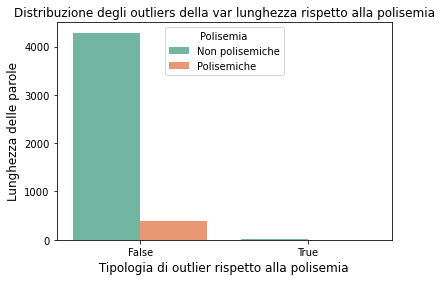

In [42]:
sns.countplot(x="outlier", hue='polysemy', data=df, palette = 'Set2')
#df.groupby("outlier")["polysemy"].value_counts().plot(kind = 'bar') 
plt.title("Distribuzione degli outliers della var lunghezza rispetto alla polisemia")
plt.xlabel(' Tipologia di outlier rispetto alla polisemia ', fontsize=12)
plt.ylabel('Lunghezza delle parole', fontsize=12)  
plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.show()

Tutti e 16 gli outlers della variabile lugnhezza sono NON polisemici (polysemy = 0)

Per visualizzare meglio la distribuzione degli outliers della varlunghezza realizziamo un **grafico a torta**

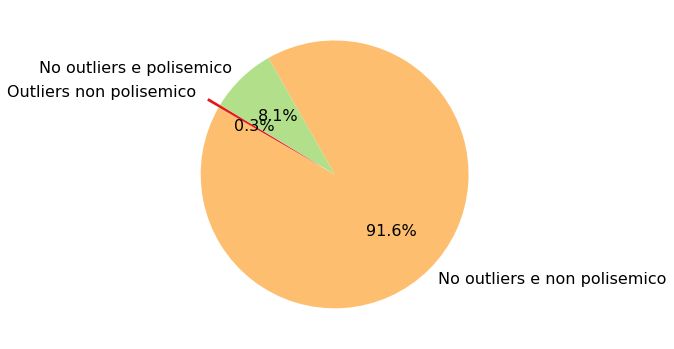

In [43]:
colors = ['#fdbf6f', '#b2df8a', '#e31a1c']
labels = ['No outliers e non polisemico', "No outliers e polisemico", "Outliers non polisemico"]
explode = (0, 0.0,0.1)
plt.rcParams["figure.figsize"] = [6, 9]


plt.pie(df.groupby("outlier")["polysemy"].value_counts(), autopct = '%1.1f%%', labels = labels, shadow = False, colors = colors, explode = explode, startangle=150,  textprops={'fontsize': 16})

#plt.legend(['No outliers e non polisemico', "No outliers e polisemico", "Outliers non polisemico"])

#plt.title("Distribuzione delle parole e degli outliers della var lunghezza")
#plt.label(fontsize=16, rotation=60)
plt.show()

### Gestione degli outliers nella **web_frequency**

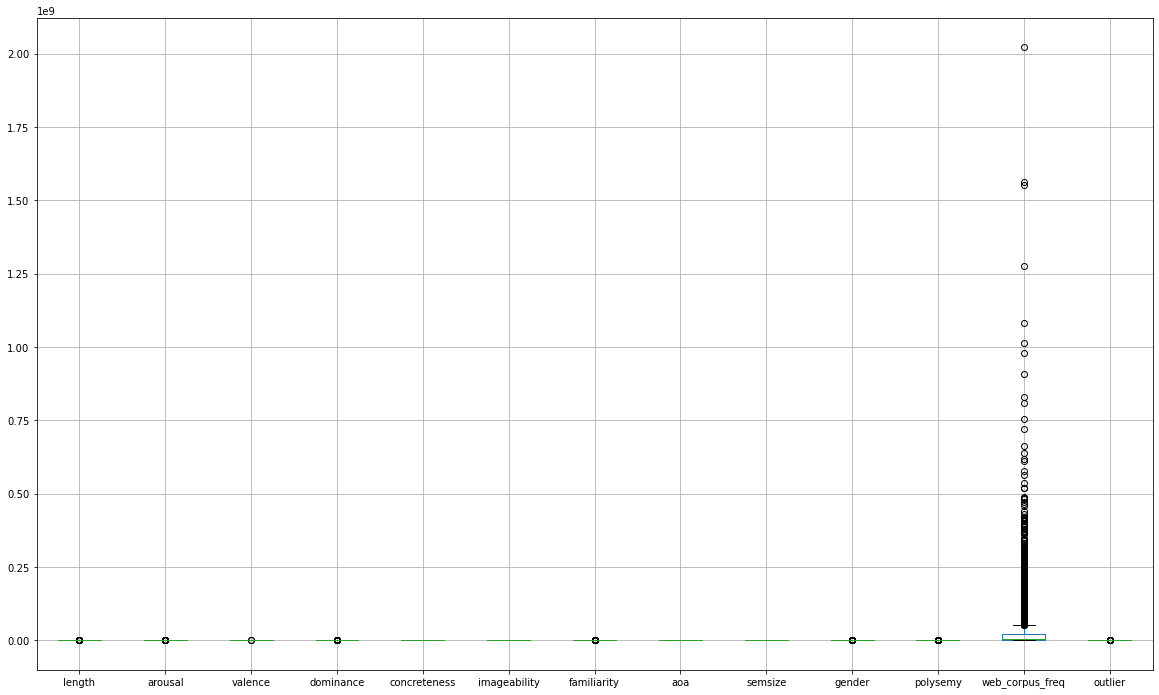

In [44]:
df.boxplot(figsize=(20,12))
plt.show()



In [45]:
df["outlier_freq"] = df["web_corpus_freq"]>= 0.50
df["outlier_freq"].value_counts()

True     4668
False      14
Name: outlier_freq, dtype: int64

In [46]:
df["outlier_freq"].dtypes

dtype('bool')

In [47]:
df.groupby("outlier_freq")["polysemy"].value_counts()

outlier_freq  polysemy
False         0             14
True          0           4289
              1            379
Name: polysemy, dtype: int64

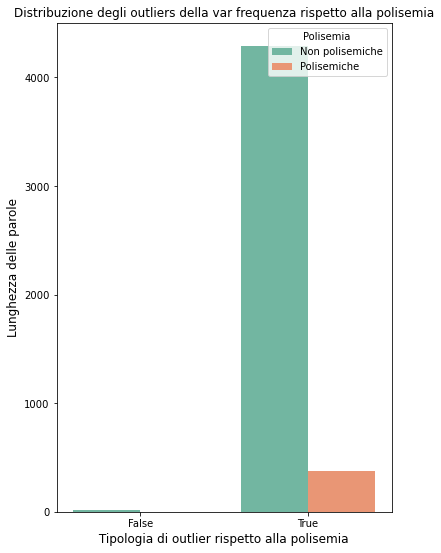

In [48]:
sns.countplot(x="outlier_freq", hue='polysemy', data=df, palette = 'Set2')
#df.groupby("outlier")["polysemy"].value_counts().plot(kind = 'bar') 
plt.title("Distribuzione degli outliers della var frequenza rispetto alla polisemia")
plt.xlabel(' Tipologia di outlier rispetto alla polisemia ', fontsize=12)
plt.ylabel('Lunghezza delle parole', fontsize=12)  
plt.legend(["Non polisemiche", "Polisemiche"]).set_title('Polisemia')
plt.show()

In [49]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


In [50]:
df_norm = pd.read_csv("normative.csv")

In [51]:
df_norm.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,frequency_log
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,6.785098
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,0.800495
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,4.106191
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,6.223394
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,6.757226
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,7.351546
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,9.305880
